In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Reading files
#df1 = pd.read_json("StreamingHistory0.json")
#df2 = pd.read_json("StreamingHistory1.json")

df = pd.read_csv("StreamingHistory.csv")

df.head()

,endTime,artistName,trackName,msPlayed
0,2020-10-06 19:22,Carter Burwell,The End,63602
1,2020-10-17 11:52,Taylor Swift,Bad Blood,303562
2,2020-10-17 11:55,Taylor Swift,A Perfectly Good Heart,136388
3,2020-10-17 11:56,Trap 6,The Cycle,1576
4,2020-10-17 11:56,Queen,Bohemian Rhapsody,3564


In [4]:
#Renaming columns
df = df.rename(columns={"artistName":"artist","endTime":"date","trackName":"track"})
df.head()

,date,artist,track,msPlayed
0,2020-10-06 19:22,Carter Burwell,The End,63602
1,2020-10-17 11:52,Taylor Swift,Bad Blood,303562
2,2020-10-17 11:55,Taylor Swift,A Perfectly Good Heart,136388
3,2020-10-17 11:56,Trap 6,The Cycle,1576
4,2020-10-17 11:56,Queen,Bohemian Rhapsody,3564


Text(0.5, 1.0, "Choosing what is a 'favorite' song")

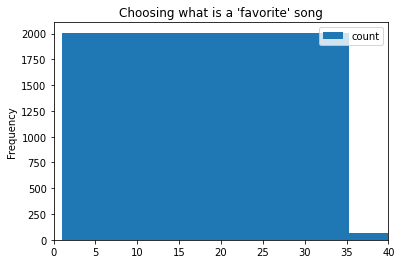

In [5]:
#Paramter for choosing a favourite song
ax = df.groupby(['artist','track']).size().to_frame('count').reset_index().plot(kind='hist',bins=9)
ax.set_xlim(0,40)
ax.set_title("Choosing what is a 'favorite' song")

In [6]:
# Find number of occurences of each song, and keep songs with 35 or more listens
df.groupby(['artist','track']).size().to_frame('count').reset_index()
df = df.groupby(['artist','track']).size().to_frame('count').reset_index()
df = df[df['count']>=35]
# To display the top 5 rows
df.head(5)

,artist,track,count
0,(G)I-DLE,LATATA,43
100,Aditi Paul,Ang Laga De,42
145,Angèle,Ta reine,94
155,Anirudh Ravichander,Kannazhaga - The Kiss of Love,84
193,Arijit Singh,"Aayat (From ""Bajirao Mastani)",47


In [15]:
# Read-in Song Features dataset
features = pd.read_csv("SpotifyFeatures.csv")

# renaming columns
features = features.rename(columns={"artist_name":"artist","track_name":"track"})
features.head(5)

,genre,artist,track,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [25]:

# Create 'favorite' column (favorite = 1, not favorite = 0)
features['same_artists'] = features.artist.isin(df.artist) 
features['same_track'] = features.track.isin(df.track) 
features["favorite"] = np.where((features["same_artists"] == True) & (features["same_track"] == True),1,0) # If both instances are True.
features = features.drop(["same_artists","same_track"],axis=1)



In [79]:
# For future use
future = features.copy(deep=True)

In [27]:
# Dropping columns
features = features.drop(columns='track_id')
features = features.drop(columns='track')


In [29]:
# How the classes are imbalanced
features.favorite.value_counts()

0    58532
1       39
Name: favorite, dtype: int64

In [30]:
#Clean data

data = features[~features.isin([np.nan, np.inf, -np.inf]).any(1)]
data.head()

data=data.dropna()

data.isnull().sum()

genre               0
artist              0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
favorite            0
dtype: int64

In [31]:
data.dtypes

genre                object
artist               object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
favorite              int64
dtype: object

In [33]:
from sklearn import preprocessing as pp
X = data.drop(columns=['favorite','genre','artist','key','mode','time_signature'])
y = data.favorite
oversample = SMOTE()
X1, y1 = oversample.fit_sample(X, y)
X1 = pd.DataFrame(X1,columns=X.columns)
X1['favorite'] = y1


X1.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,favorite
0,0.0,0.611,0.389,99373.0,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814,0
1,1.0,0.246,0.590,137373.0,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816,0
2,3.0,0.952,0.663,170267.0,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368,0
3,0.0,0.703,0.240,152427.0,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227,0
4,4.0,0.950,0.331,82625.0,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390,0


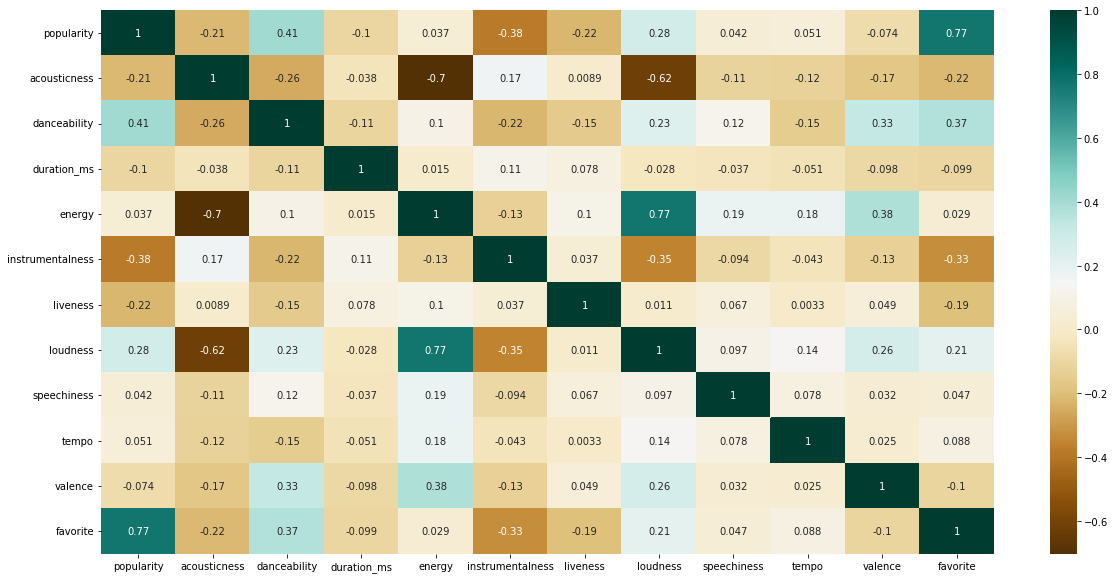

In [35]:
# Correlation Matrix of quantitative features
plt.figure(figsize=(20,10))
c = X1.corr()
corr = sns.heatmap(c,cmap="BrBG",annot=True)

In [36]:
# Importing required libraries
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Train / Split Data
X_train, X_test, y_train, y_test = train_test_split(X1.drop(columns='favorite'), X1.favorite,test_size = .20)



popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64

## **Model Selection with Cross-validation and Hyperparameter Optimization**

In [38]:
%%time
# Logistic Regression
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
np.mean(lr_scores)

CPU times: user 11.4 s, sys: 7.19 s, total: 18.6 s
Wall time: 9.58 s


In [39]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 30}

In [47]:
%%time
# Decision Tree
dt = DecisionTreeClassifier(max_depth=30)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)
dt.fit(X_train,y_train)

CPU times: user 28.1 s, sys: 38.7 ms, total: 28.1 s
Wall time: 28.1 s


In [41]:
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[6,12,15,20],
    'n_estimators':[20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

{'max_depth': 20, 'n_estimators': 20}

In [42]:
%%time
# Cross-validation for RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 20, max_depth = 30))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

CPU times: user 1min 26s, sys: 178 ms, total: 1min 26s
Wall time: 1min 26s


Based on F1 score, we can conclude that the Random Forest Tree is the best model for our prediction problem.

Now, I will predict 'favorite' songs from the entire dataset, and get the songs that were not favorited initially but are predicted to be.

**Predicting Songs and Saving Dataset for Personal Use**

In [83]:

f=future.drop(columns=['favorite','genre','artist','key','time_signature','mode'])
#future.head()
f=f.dropna()
f.isnull().sum()
prediction = dt.predict(f)

In [85]:
future = future.dropna()
future['prediction'] = prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
# Gets only songs that were not favorites but are predicted to be
future = future[(future['favorite']==0) & (future['prediction'] == 1)]

In [88]:
future = future.drop(columns=['energy','duration_ms','acousticness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence'])

In [89]:
future

,genre,artist,popularity,danceability,instrumentalness,favorite,prediction
139,R&B,Olivia O'Brien,68.0,0.653,0.000000,0,1
144,R&B,Usher,69.0,0.761,0.000000,0,1
154,R&B,SZA,65.0,0.759,0.000000,0,1
156,R&B,Roy Woods,68.0,0.690,0.000000,0,1
161,R&B,Rihanna,72.0,0.637,0.000000,0,1
...,...,...,...,...,...,...,...
56766,R&B,Fifth Harmony,65.0,0.592,0.000000,0,1
56985,R&B,Zara Larsson,67.0,0.650,0.000000,0,1
56988,R&B,Sade,65.0,0.728,0.000062,0,1
57314,R&B,Natasha Bedingfield,66.0,0.734,0.000000,0,1


In [90]:
# Saving csv
future.to_csv("recommendations.csv")